# **Lions vs Cheetahs**
**Introduction**

On the savannahs of Africa, two of the continent's fiercest predators, the lion and the cheetah, have long been rivals in the hunt for food and survival.

**Physical Characteristics**

While both are large cats, lions are much bigger and more powerful than cheetahs. Lions have a distinctive mane of hair around their necks, which helps protect them during fights with other lions. Cheetahs, on the other hand, have a leaner, more agile build that allows them to run faster than any other land animal.

**"Lions vs Cheetah" Classification Task Introduction**

In this classification task, the goal is to accurately classify whether an image contains a lion or a cheetah. A dataset has been picked up from Kaggle containing the images of the same , here is the link to the folder : https://www.kaggle.com/datasets/mikoajfish99/lions-or-cheetahs-image-classification another task of this is to clean the dataset mentioned just now as it contains a lot of junk images.

The model will need to learn the distinguishing features between the two species and be able to accurately predict the species of a new image that it has not seen before. The accuracy of the model's predictions will be measured using metrics such as ***loss***, ***accuracy***.

This classification task has real-world applications in wildlife conservation, where identifying and tracking populations of lions and cheetahs is crucial for their conservation and protection. Additionally, this task can be used to train models for other similar classification tasks in the field of computer vision
<center>
<img src="https://media.tenor.com/U-8NcPVuj_kAAAAC/mufasa-lionking.gif" alt="Lets Classify Lions and Cheetahs">
</center>


In [141]:
!pip install -Uqq fastbook

<center>
<img src="https://camo.githubusercontent.com/3bb4e2eba7c8a91d71916496bc775e870222f19bb5098cb4bc514ed60078c1e7/68747470733a2f2f626c6f672e7161746573746c61622e636f6d2f77702d636f6e74656e742f75706c6f6164732f323032302f30312f4d4c5f6578616d706c652e6769663f7261773d74727565" alt="Lets Classify Lions and Cheetahs">
</center>

Fastai is a high-level deep learning library that is built on top of PyTorch. It is designed to make it easier and faster to create accurate and complex deep learning models with fewer lines of code. Fastai provides a number of features that make it a powerful tool for deep learning, including:

High-level abstractions for common deep learning tasks such as image classification, natural language processing, and tabular data analysis.
Pre-built architectures for common deep learning models, such as convolutional neural networks (CNNs), recurrent neural networks (RNNs), and transformers.
Easy-to-use data processing pipelines that can automatically download and preprocess data from a variety of sources.
Advanced training techniques such as learning rate annealing, cyclical learning rates, and discriminative learning rates that can significantly improve model performance.
A community-driven approach to development, with a focus on making deep learning more accessible to researchers, developers, and students.
Fastai has become a popular choice for deep learning practitioners because of its ease of use and powerful features. It has been used to build a wide range of applications, including image and speech recognition, natural language processing, and autonomous 

In [142]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
from pathlib import Path

This line of code assigns the value of the environment variable 'AZURE_SEARCH_KEY' to the variable 'key', or if the environment variable is not set, it assigns the default value of '###' to 'key'.

To download images with Bing Image Search, sign up at Microsoft Azure for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing '###' with your key and executing it):

In [143]:
key = os.environ.get('AZURE_SEARCH_KEY','###')

We'll define the classes that we need to search the images , this will be the two classes lions and cheetahs , using this we will Bing Image Search and get the dataset, and can put the images in their respective folders

In [144]:
classes = 'lions','cheetahs'
path = Path('train_images')

In [145]:
if not path.exists():
    path.mkdir()
    for o in classes:
        dest= (path/o)
        dest.mkdir(exist_ok =True)
        results = search_images_bing(key,o)
        download_images(dest, urls=results.attrgot('contentUrl'))

Often when we retrieve images from the internet it can be corrupted and use the path.unlink to remove the respective images

In [146]:
fns = get_image_files(path)
failed = verify_images(fns)

In [147]:
failed.map(Path.unlink)

(#0) []

This code defines a *DataBlock* object for a computer vision dataset, with two blocks: **ImageBlock** and **CategoryBlock**, representing the input images and their corresponding categories respectively.

The **get_items** argument specifies a function to get a list of input items (in this case, image files) 
**get_y** argument specifies a function to extract the label for each item from its parent folder name.

The **splitter** argument uses a RandomSplitter to split the dataset into training and validation sets with a validation percentage of 20% and a seed of 42 for reproducibility.

The **item_tfms** argument applies a RandomResizedCrop transformation to the input images, which crops and resizes the images to a size of 128x128 pixels with a random scale and aspect ratio.

The **batch_tfms** argument applies data augmentation transformations to the batch of images during training, which help to prevent overfitting and improve the generalization of the model.

Overall, this code sets up a pipeline for loading, preprocessing, and augmenting a computer vision dataset for training a deep learning model

In [148]:
dataset = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    get_y =parent_label,
    splitter= RandomSplitter(valid_pct=0.2,seed=42),
    item_tfms = RandomResizedCrop(128, min_scale=0.5), 
    batch_tfms = aug_transforms()
)

In [149]:
dls = dataset.dataloaders(path,verbose = True)

Found 280 items
2 datasets of sizes 224,56
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: RandomResizedCrop -- {'size': (128, 128), 'min_scale': 0.5, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'max_scale': 1.0, 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}


Showing the training batch images

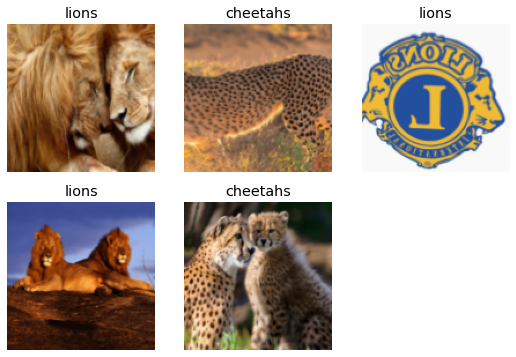

In [161]:
dls.train.show_batch(max_n=5)

Showing the validation batch images

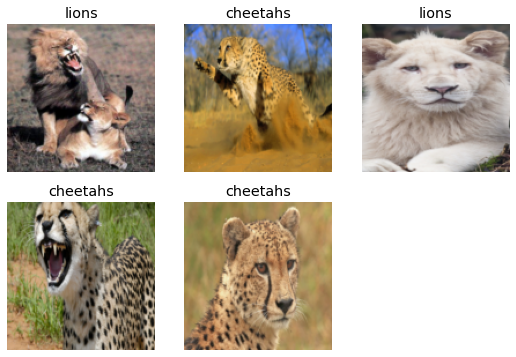

In [162]:
dls.valid.show_batch(max_n=5)

Imported the test folder through the drive

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Our test dataset , will be imported through the dataloaders class

In [150]:
test_dl = dls.test_dl(get_image_files('/content/drive/MyDrive/Test'), verbose =True)

# Resnets 18

For this model ,we will use a Resnet model the summary of the model is as follows:
<center>
<img src = "https://i.stack.imgur.com/pkPi3.png" align = "center">
</center>



In [163]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [151]:
learn = vision_learner(dls, resnet18, metrics = [error_rate,accuracy])
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.334225,0.327174,0.178571,0.821429,00:49


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.498632,0.108486,0.035714,0.964286,00:39
1,0.359019,0.042916,0.017857,0.982143,00:37
2,0.301677,0.045397,0.017857,0.982143,00:40


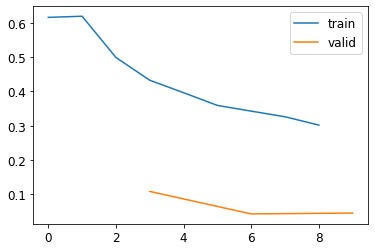

In [152]:
learn.recorder.plot_loss(skip_start = 0,with_valid = True)

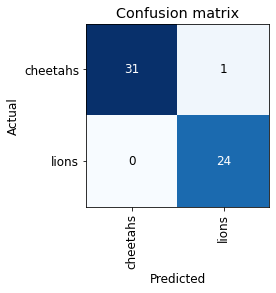

In [153]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

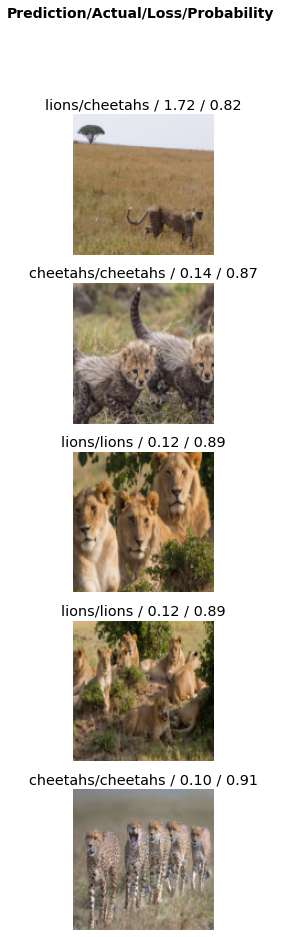

In [168]:
interp.plot_top_losses(5, nrows =5)

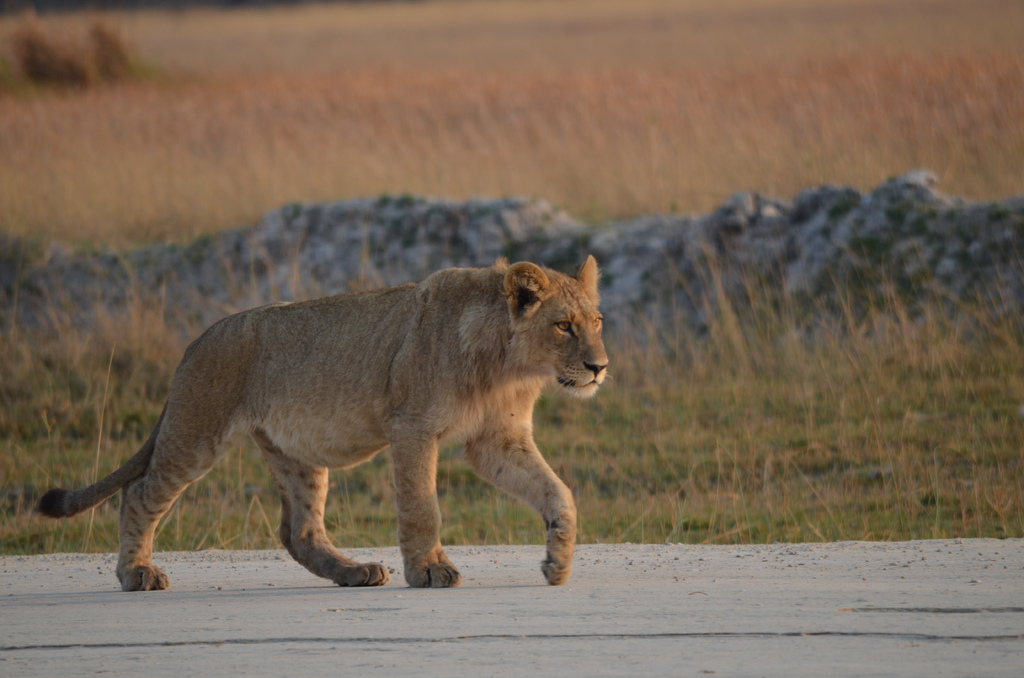

In [155]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Test/01dddc577890595e.jpg')
img.show()

In [164]:
predictions,_ = learn.get_preds(dl = test_dl) 

In [165]:
lion_or_cheetah_indices = np.where(np.max(predictions.numpy(), axis=1) > 0.8)[0]

In [166]:
lion_cheetah_images = [test_dl.items[i] for i in lion_or_cheetah_indices]

In [167]:
import shutil
dest_folder = Path('/content/drive/MyDrive/New_Folder2')
if not dest_folder.exists():
  dest_folder.mkdir()
  for images in lion_cheetah_images:
    ifile_path = os.path.basename(images)
    shutil.copy(images,os.path.join(dest_folder,ifile_path))